<style>
/* Centered title “card” with background (light & dark mode) */
.title-card {
  text-align: center;
  padding: 28px 24px;
  border-radius: 16px;
  border: 1px solid rgba(128,128,128,0.25);
  box-shadow: 0 10px 24px rgba(0,0,0,0.12);
  color: #0f172a;
  background: linear-gradient(135deg, #f8fafc, #eef2ff);
  font-family: ui-sans-serif, -apple-system, Segoe UI, Roboto, Helvetica, Arial, "Apple Color Emoji", "Segoe UI Emoji";
}
.title-card h1 {
  margin: 0 0 8px 0;
  font-size: 2rem;
  line-height: 1.2;
}
.title-card p { margin: 6px 0; font-size: 1rem; }
.title-card .muted { color: #475569; }

/* Feature table */
.feature-table {
  width: 100%;
  border-collapse: collapse;
  margin-top: 12px;
}
.feature-table th, .feature-table td {
  border: 1px solid rgba(128,128,128,0.25);
  padding: 8px 10px;
  text-align: left;
  vertical-align: top;
  font-size: 0.95rem;
  background: rgba(255,255,255,0.55);
}
.feature-table th {
  font-weight: 700;
  background: rgba(99,102,241,0.10);
}

/* Dark mode */
@media (prefers-color-scheme: dark) {
  .title-card {
    color: #e5e7eb;
    background: linear-gradient(135deg, #0b1220, #111827);
    border-color: rgba(255,255,255,0.08);
    box-shadow: 0 12px 30px rgba(0,0,0,0.45);
  }
  .feature-table th, .feature-table td {
    border-color: rgba(255,255,255,0.12);
    background: rgba(17,24,39,0.6);
  }
  .feature-table th { background: rgba(99,102,241,0.18); }
  .title-card .muted { color: #9aa3b2; }
}
</style>

<div class="title-card">
  <h1>Customer Segmentation — Clustering Project</h1>
  <p><em>Group customers into meaningful segments using the available features.</em></p>
  <p class="muted">Suggestion: try multiple algorithms (K-Means, DBSCAN, Agglomerative, GMM) and compare results.</p>

  <hr style="width:60%;border:0;border-top:1px solid rgba(128,128,128,0.25);margin:14px auto;">

  <p><strong>Prepared by:</strong> Alireza Javid</p>
  <p class="muted">M.Sc. Student, Structural Engineering — Sharif University of Technology</p>
  <p class="muted">Date: November 7, 2022</p>

  <table class="feature-table">
    <thead>
      <tr>
        <th>Column (English)</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><code>CustomerID</code></td>
        <td>Unique customer identifier</td>
      </tr>
      <tr>
        <td><code>Gender</code></td>
        <td>Customer gender</td>
      </tr>
      <tr>
        <td><code>Age</code></td>
        <td>Customer age (years)</td>
      </tr>
      <tr>
        <td><code>Annual Income</code></td>
        <td>Annual income (units as provided)</td>
      </tr>
      <tr>
        <td><code>Spending Score</code></td>
        <td>Behavior-based score (e.g., purchasing/engagement)</td>
      </tr>
    </tbody>
  </table>
</div>


# First I solve this project with K-Means method

### Import libraries

Let's first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [179]:
import random 
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Read data

Let's read dataset to see what features the manufacturer has collected about the existing models.


In [54]:
data= pd.read_csv("Customer.csv")
data['Gender'] = data['Gender'].apply({'Male':1, 'Female':0}.get)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.


In [55]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take look at cluster labels.


In [82]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[2 2 0 1 1 1 0 1 3 1 3 1 0 1 3 2 0 2 3 1 3 2 0 2 0 2 0 2 0 1 3 1 3 2 0 1 0
 1 0 1 0 2 3 1 0 1 0 1 1 1 0 2 1 3 0 3 0 3 1 3 3 2 0 0 3 2 0 0 2 1 3 0 0 0
 3 2 0 3 1 0 3 2 3 0 1 3 0 1 1 0 0 2 3 0 1 2 0 1 3 2 1 0 3 2 3 1 0 3 3 3 3
 1 0 2 1 1 0 0 0 0 2 0 1 2 1 1 3 2 3 2 3 2 1 1 3 1 0 2 3 1 0 2 1 1 3 2 3 1
 0 2 3 2 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 0 2 3 2 3 2 0 1 3 2 3 2 0 1 3 1 0
 2 0 2 0 1 0 1 3 1 0 1 0 2 3 2]


<h2 id="insights">Insights</h2>

We assign the labels to each row in dataframe.


In [83]:
data["Clus_km"] = labels
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,1
4,5,0,31,17,40,1


We can easily check the centroid values by averaging the features in each cluster.


In [84]:
data.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,94.818182,0.0,48.109091,58.818182,34.781818
1,100.210526,0.0,28.438596,59.666667,67.684211
2,103.375000,1.0,28.250000,62.000000,71.675000
3,104.958333,1.0,49.437500,62.416667,29.208333


Now, let's look at the distribution of customers based on their age and income:


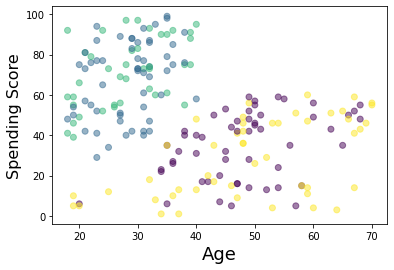

In [85]:
plt.scatter(X[:, 1], X[:, 3], c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9132\2579094311.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


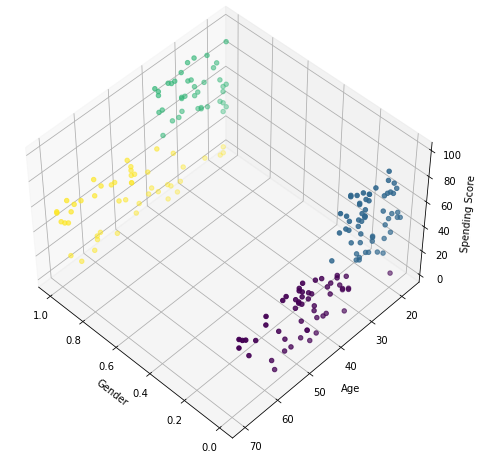

In [86]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')

ax.scatter(X[:, 0], X[:, 1], X[:, 3], c= labels.astype(float))

# Now I solve this project with Hierarchical method

## Read data

Let's read dataset to see what features the manufacturer has collected about the existing models.


In [164]:
filename = 'customer.csv'
#Read csv
pdf = pd.read_csv(filename)
pdf['Gender'] = pdf['Gender'].apply({'Male':1, 'Female':0}.get)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Feature selection

Let's select our feature set:


In [165]:
featureset = pdf[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

In [166]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

<h2 id="clustering_using_scipy">Clustering using Scipy</h2>

In this part we use Scipy package to cluster the dataset.

First, we calculate the distance matrix.


In [167]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

C:\Users\User\AppData\Local\Temp\ipykernel_9132\458117257.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


array([[0.        , 0.43029381, 1.05538015, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 1.25941672, ..., 0.93683095, 1.20748243,
        1.01507247],
       [1.05538015, 1.25941672, 0.        , ..., 1.53221213, 1.43245312,
        1.62419301],
       ...,
       [1.00888686, 0.93683095, 1.53221213, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.43245312, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.62419301, ..., 0.13432353, 0.66437953,
        0.        ]])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest.
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
\- single
\- complete
\- average
\- weighted
\- centroid

We use **complete** for our case, but feel free to change it to see how the results change.


In [168]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\User\AppData\Local\Temp\ipykernel_9132\227076933.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:

In [169]:
from scipy.cluster.hierarchy import fcluster
max_d = 5.7
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([4, 4, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 4, 4, 2, 4, 3, 2, 4, 4,
       1, 4, 1, 4, 2, 4, 2, 2, 3, 2, 3, 4, 1, 2, 2, 2, 2, 2, 1, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 3, 4, 1, 2, 3, 4,
       2, 1, 4, 2, 3, 2, 1, 1, 3, 4, 2, 4, 2, 2, 3, 4, 3, 2, 2, 4, 2, 2,
       2, 2, 1, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 3, 4, 4, 2, 1, 3, 3, 3,
       3, 2, 2, 4, 2, 2, 1, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 3, 4, 3, 4,
       2, 2, 3, 2, 1, 4, 3, 2, 1, 4, 2, 2, 3, 4, 4, 2, 1, 4, 3, 4, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 4, 3, 4, 3, 4, 1, 2,
       3, 4, 3, 4, 1, 2, 3, 2, 1, 4, 1, 4, 1, 2, 1, 2, 3, 2, 1, 2, 1, 4,
       3, 4], dtype=int32)

Also, you can determine the number of clusters directly:


In [170]:
from scipy.cluster.hierarchy import fcluster
k = 4
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([4, 4, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 4, 4, 2, 4, 3, 2, 4, 4,
       1, 4, 1, 4, 2, 4, 2, 2, 3, 2, 3, 4, 1, 2, 2, 2, 2, 2, 1, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 3, 4, 1, 2, 3, 4,
       2, 1, 4, 2, 3, 2, 1, 1, 3, 4, 2, 4, 2, 2, 3, 4, 3, 2, 2, 4, 2, 2,
       2, 2, 1, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 3, 4, 4, 2, 1, 3, 3, 3,
       3, 2, 2, 4, 2, 2, 1, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 3, 4, 3, 4,
       2, 2, 3, 2, 1, 4, 3, 2, 1, 4, 2, 2, 3, 4, 4, 2, 1, 4, 3, 4, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 4, 3, 4, 3, 4, 1, 2,
       3, 4, 3, 4, 1, 2, 3, 2, 1, 4, 1, 4, 1, 2, 1, 2, 3, 2, 1, 2, 1, 4,
       3, 4], dtype=int32)

Now, plot the dendrogram:

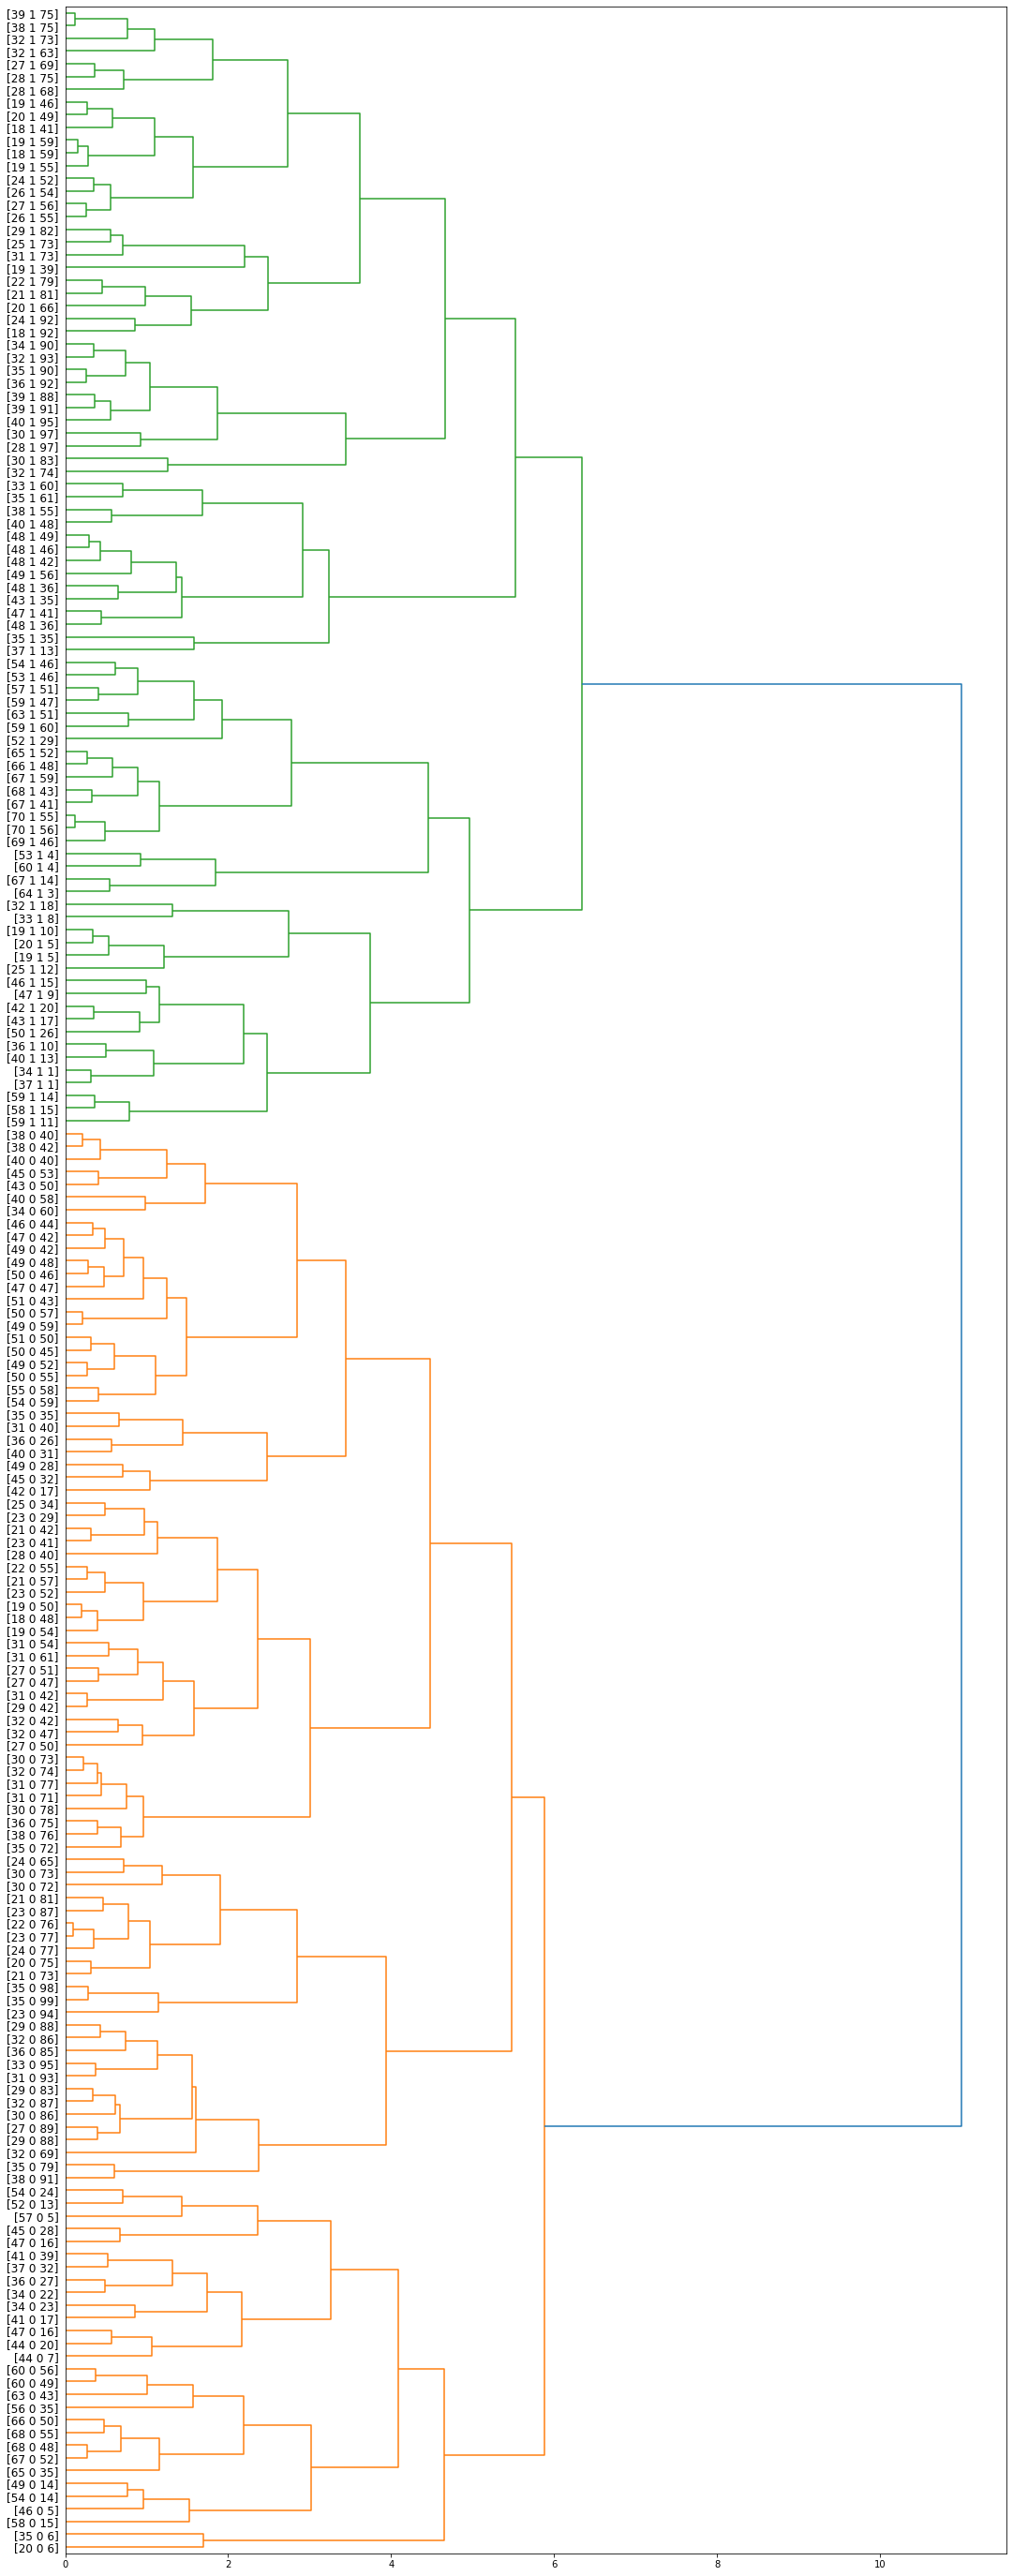

In [171]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['Age'][id], pdf['Gender'][id], int(float(pdf['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<h2 id="clustering_using_skl">Clustering using scikit-learn</h2>

Let's redo it again, but this time using the scikit-learn package:


In [172]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [173]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\User\AppData\Local\Temp\ipykernel_9132\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


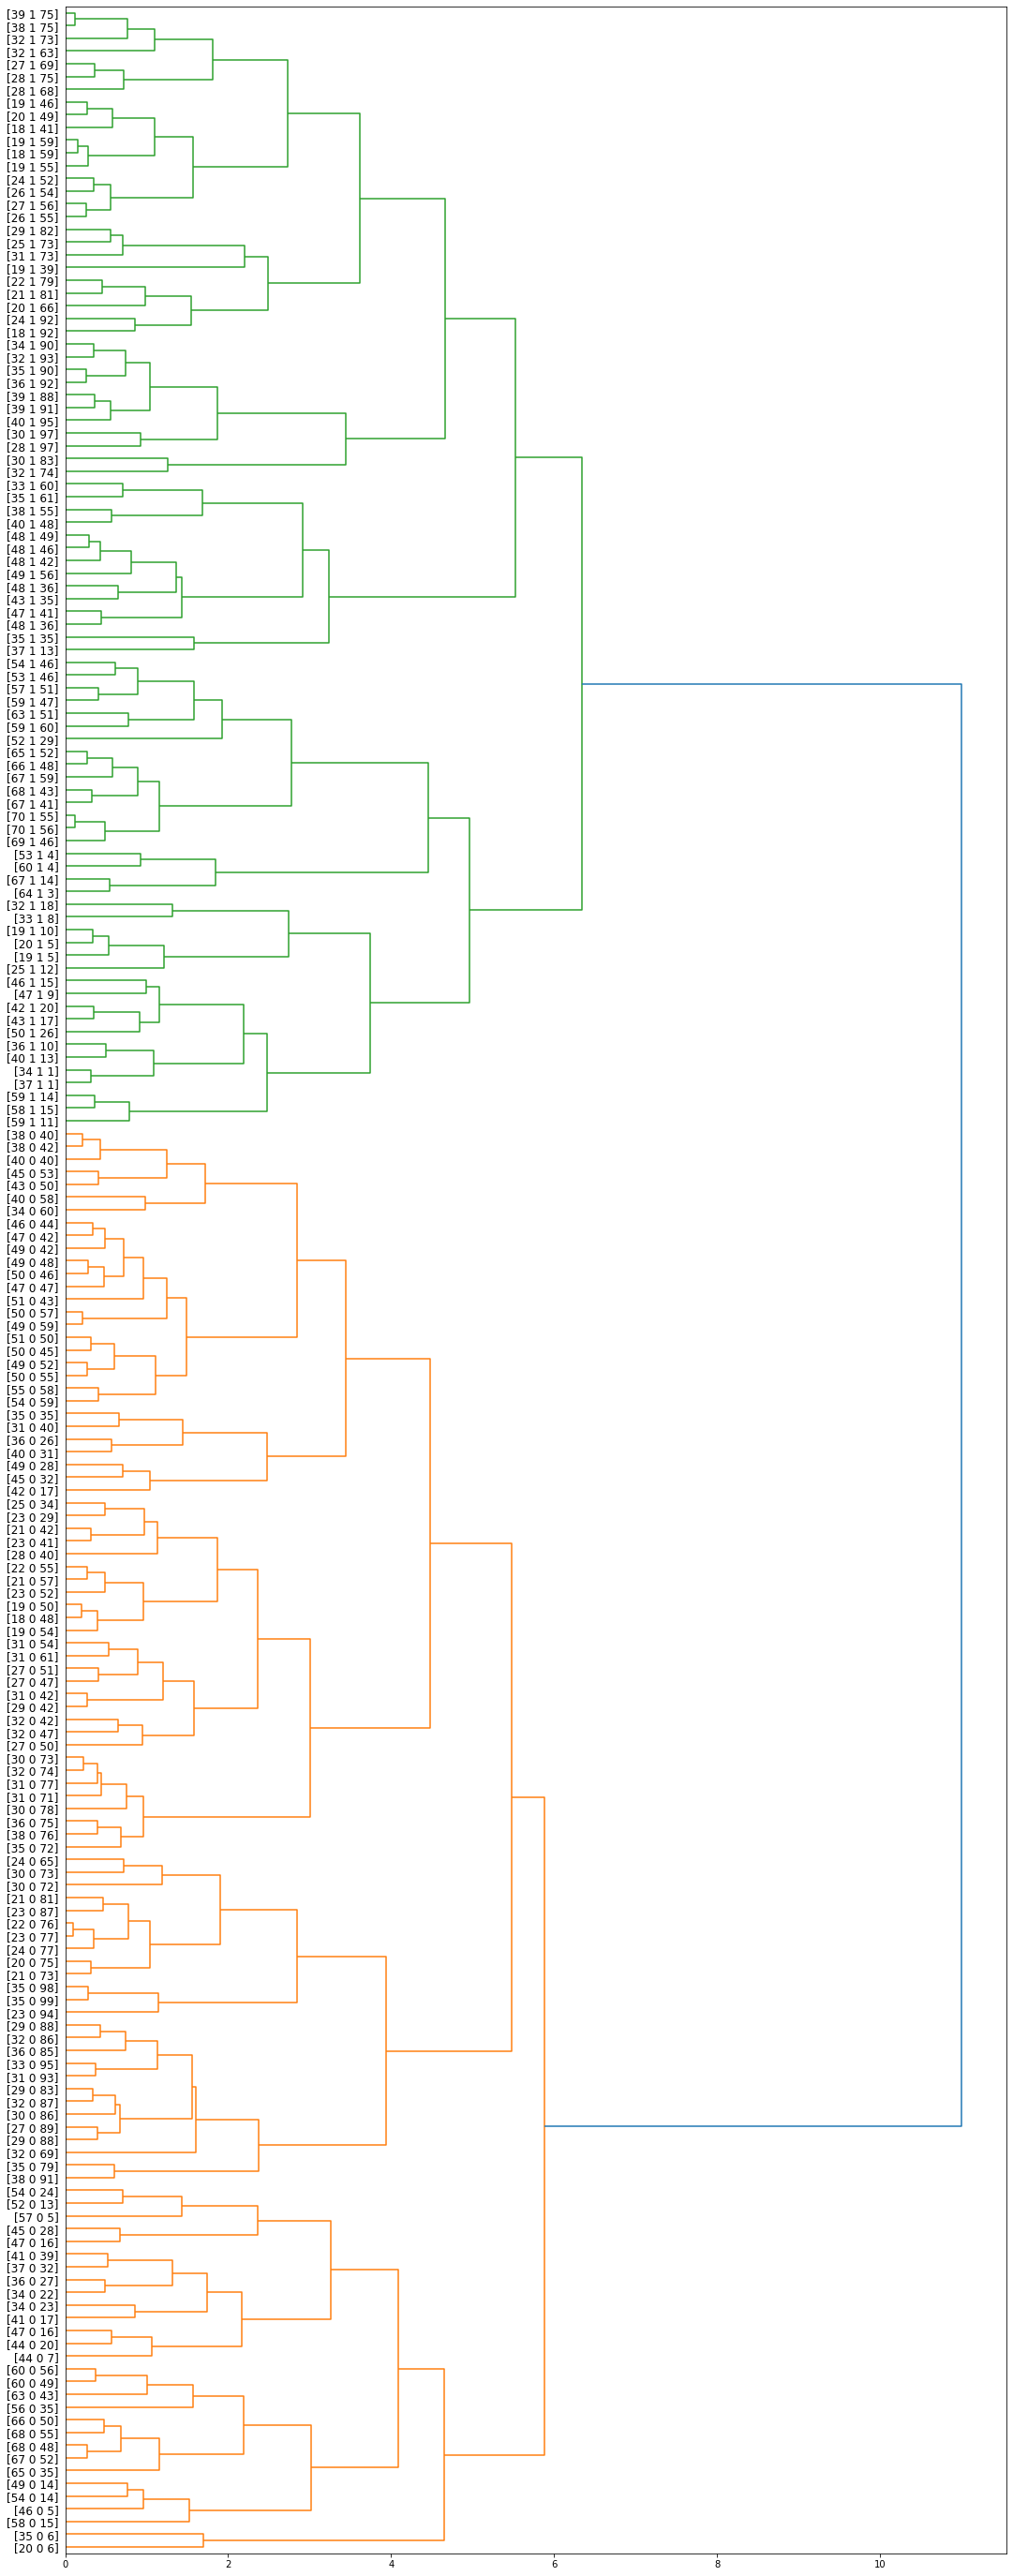

In [174]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['Age'][id], pdf['Gender'][id], int(float(pdf['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

*   Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
*   Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
*   Average linkage minimizes the average of the distances between all observations of pairs of clusters.


In [175]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0,
       3, 0, 3, 0, 1, 0, 1, 1, 2, 1, 2, 0, 3, 1, 1, 1, 1, 1, 3, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 3, 1, 2, 0,
       1, 3, 0, 1, 2, 1, 3, 3, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1,
       1, 1, 3, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 3, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 1, 3, 0, 2, 1, 3, 0, 1, 1, 2, 0, 0, 1, 3, 0, 2, 0, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 3, 1,
       2, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 3, 0,
       2, 0], dtype=int64)

In [176]:
pdf['Income'] = pdf['Annual Income (k$)']
pdf['Spending'] = pdf['Spending Score (1-100)']
pdf['cluster_'] = agglom.labels_
pdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income,Spending,cluster_
0,1,1,19,15,39,15,39,0
1,2,1,21,15,81,15,81,0
2,3,0,20,16,6,16,6,3
3,4,0,23,16,77,16,77,1
4,5,0,31,17,40,17,40,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

[0.5 0.  1.  1. ] 0
[0.16666667 0.8660254  0.8660254  1.        ] 1
[0.83333333 0.8660254  0.5        1.        ] 2
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00] 3


Text(0, 0.5, 'Spending Score (1-100)')

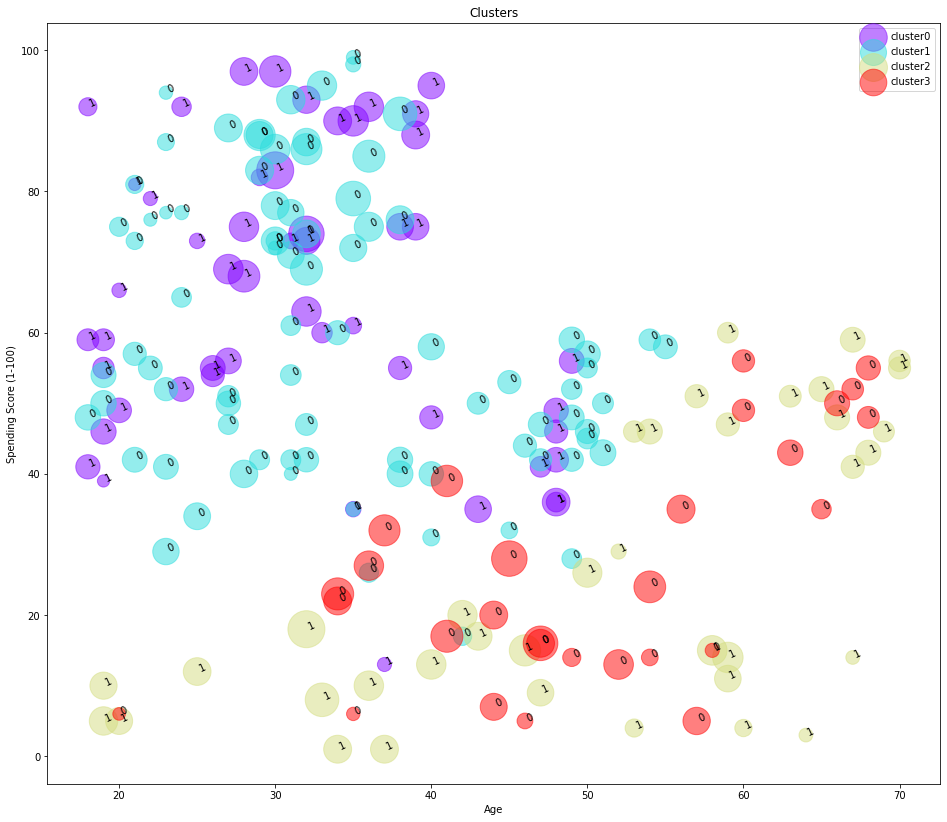

In [177]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    print(color,label)
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset.Spending[i], str(subset.Gender[i]), rotation=25) 
    plt.scatter(subset.Age, subset.Spending, s= subset.Income*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')


# Finally I solve this project with DBSCAN method

###  Load the dataset

We will import the .csv then we creates the columns for year, month and day.


In [216]:
filename='customer.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf['Gender'] = pdf['Gender'].apply({'Male':1, 'Female':0}.get)
pdf.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


###  Clustering of data's based on Gender, Age, Annual Incame , and Spending Score (1-100)

In this section we run DBSCAN

In [215]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Age','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=10, min_samples=20).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[['Gender','Age','Annual Income (k$)','Spending Score (1-100)','Clus_Db']].head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_Db
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


In [312]:
X = pdf[['Gender','Age','Spending Score (1-100)']]
X = X.values[:,:]
X = np.nan_to_num(X)
epsilon = 10
minimumSamples = 20
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels 

array([-1,  0, -1,  0,  1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  2,
        0, -1,  0,  2,  0, -1,  0, -1,  0,  2,  0,  2,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  2,  0, -1,  0,  2,  1,  1,  1,  2,
        0,  1,  2,  2,  2,  2, -1,  1,  2, -1,  1, -1,  2,  2,  1,  2, -1,
        1,  1, -1,  2,  2,  2,  2,  1,  2,  2,  1,  2,  2,  2, -1,  2,  1,
        2,  2,  1,  0,  2, -1,  1,  2,  2,  1,  1,  2,  1,  2,  1,  1,  2,
       -1,  1,  2,  1,  2,  2, -1,  2,  2,  1,  2,  1,  1,  1,  2,  2,  2,
        2,  1,  2,  2,  0, -1,  0,  2,  0, -1,  0, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0,  1,  0, -1,  0,  2,  0, -1,  0, -1,  0, -1,
        0, -1,  0, -1,  0, -1,  0,  2,  0, -1,  0, -1,  0, -1,  0, -1,  0,
       -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  2,  0, -1,  0,  2,  0, -1,
        0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0], dtype=int64)

### Distinguish outliers

Let's Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.


In [313]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False,

In [314]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [315]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Data visualization


In [316]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


Text(0, 0.5, 'Spending Score (1-100)')

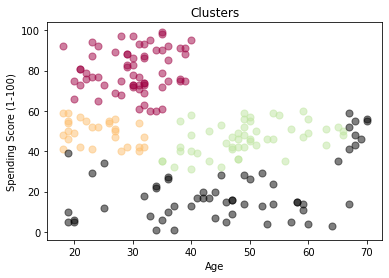

In [317]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 1], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 1], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)
    
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
